In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/home/tankinhbui/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
df_train = pd.read_csv('../input/train.csv')

In [3]:
df_test = pd.read_csv('../input/test.csv')

### Khảo sát dữ liệu

In [4]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
test_Id = df_test.Id

In [6]:
df_train.shape

(1460, 81)

In [7]:
df_test.shape

(1459, 80)

In [8]:
Y_train = df_train.SalePrice

In [9]:
#df_train.drop(['SalePrice'], axis=1, inplace=True)

In [10]:
Y_train.shape

(1460,)

In [11]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Khảo sát đánh giá 'SalePrice'

In [12]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Biểu đồ tần suất:
1. Histogram(biểu đồ tần suất): dùng để tóm tắt phân phối dữ liệu.Dữ liệu được chia thành nhiều khoản có cùng độ dài, số điểm được tính trong mỗi khoảng và được vẽ như các thanh trong một biểu đồ tần suất.Trục tung (vertical axis) cho biết tỷ lệ của các quan sát trong mỗi thanh và chiều cao tương đối của các thanh thể hiện mật độ tương đối của số trường hợp (cases) trong các khoảng.
2. "fit = norm" đường phân phối chuẩn(Gauss).
3. Histogram áp dụng cho khi cần xem phân phối của dữ liệu, dữ liệu dạng số  có thể ngắt quãng.z

Tính chất của phân phối chuẩn:
 1. Hàm mật độ là đối xứng qua giá trị trung bình (giá trị kì vọng).
 2. Giá trị trung bình cũng là mode và trung vị của nó.

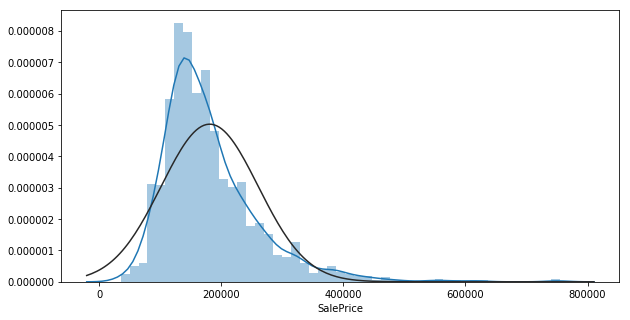

In [13]:
#histogram
plt.subplots(figsize = (10,5))
sns.distplot(df_train['SalePrice'], fit=norm)

- Độ nhọn(kurt()) của phân phối phản ánh độ cao của trung tâm phân phối so với phân phối chuẩn.
- kurtosis của phân phối chuẩn bằng 3.

- Độ lêch(skew()) đo sự cân bằng của phân phối so với phân phối chuẩn.
- Độ lệch được coi là đáng kể nếu giá trị tuyệt đối của nó ≥0.5 (tức là giá trị ≤−0.5 hoặc ≥+0.5)

In [14]:
print("skewness :", df_train['SalePrice'].skew()) #do lech so voi phan phoi chuan

skewness : 1.8828757597682129


In [15]:
print("kurtosis :", df_train['SalePrice'].kurt()) #do nhon 

kurtosis : 6.536281860064529


In [16]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


#### Dữ liệu liên tục

In [17]:
df_train.dtypes[df_train.dtypes == 'object'].index

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [18]:
df_num_feature = df_train.dtypes[df_train.dtypes != 'object'].index

In [19]:
df_num_featuure

NameError: name 'df_num_featuure' is not defined

In [20]:
corr_num_feature = df_train[df_num_feature].corr()

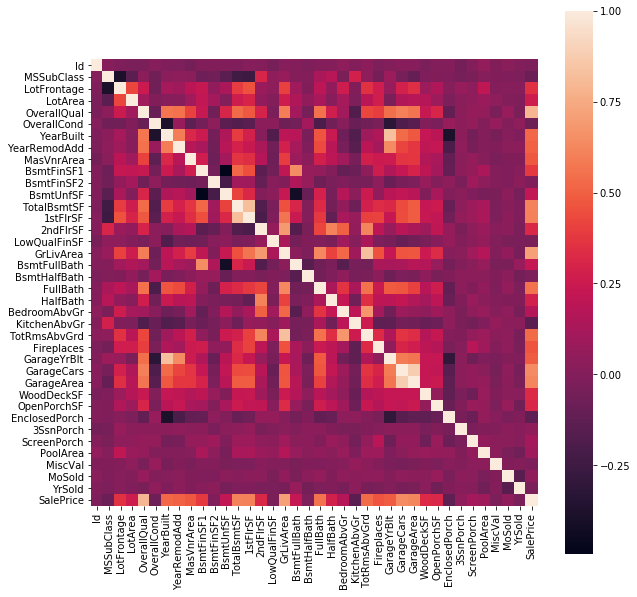

In [21]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(corr_num_feature, square=True)

In [22]:
# Relationship with numerical variables

In [23]:
cols = corr_num_feature.nlargest(10, 'SalePrice')['SalePrice'].index

In [24]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

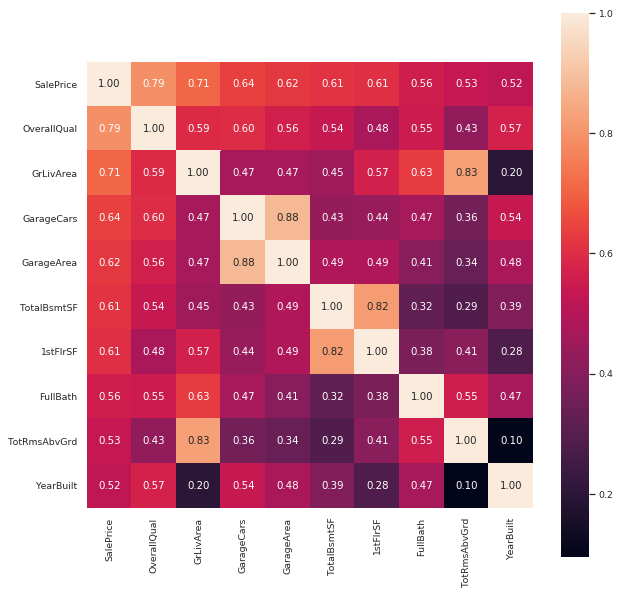

In [25]:
fig = plt.figure(figsize=(10,10))
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=0.85)
sns.heatmap(cm, fmt='.2f', square=True,yticklabels=cols.values, xticklabels=cols.values, annot=True)

GrLivArea: Above grade (ground) living area square feet(tổng diện tích các tầng m^2)

In [26]:
data = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis=1)
data.head()

,SalePrice,GrLivArea
0,208500,1710
1,181500,1262
2,223500,1786
3,140000,1717
4,250000,2198


Biểu đồ phân tán(plot.scatter(x,y): 
- Vẽ một biến ở trục hoành theo mộtbiến khác ở trục tung.
- Đó là một phương pháp hữu ích để phân tích mối quanhệ giữa hai biến. Ví dụ, nó có thể làm rõ một mối quan hệ phi tuyến giữa hai biến hoặc nó có thể cho thấy có tồn tại các quan sát bất thường hay không.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


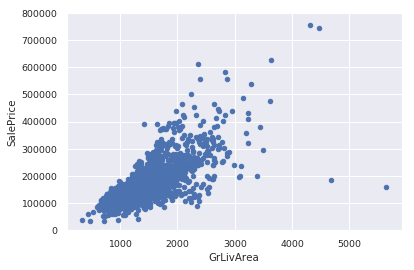

In [27]:
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim= (0,800000))

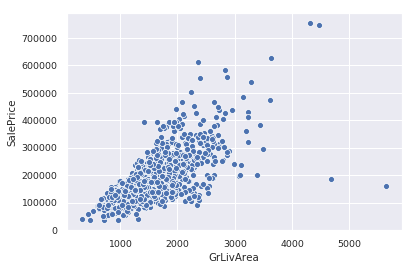

In [28]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=data)

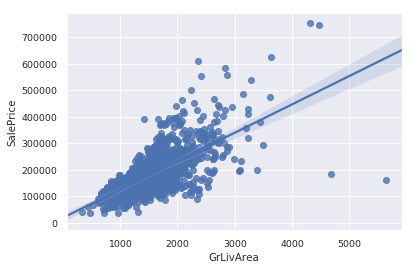

In [29]:
sns.regplot(x='GrLivArea', y='SalePrice', data=data)

TotalBsmtSF: Total square feet of basement area(tổng diện tích tầng hầm)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


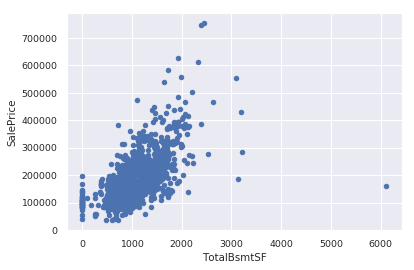

In [30]:
#scatter totalbmstsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['TotalBsmtSF'], df_train['SalePrice']], axis=1)
data.plot.scatter(x= var, y='SalePrice')

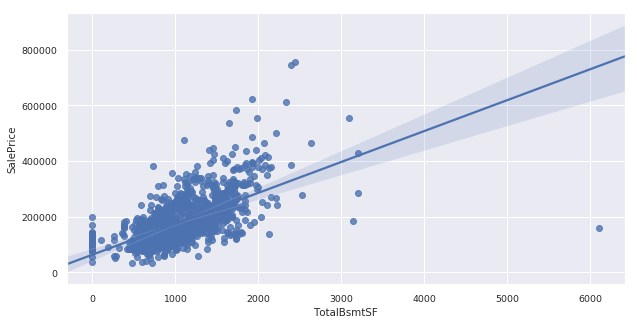

In [31]:
fig = plt.figure(figsize=(10,5))
sns.regplot(x=var, y='SalePrice', data=data)

<Figure size 720x360 with 0 Axes>

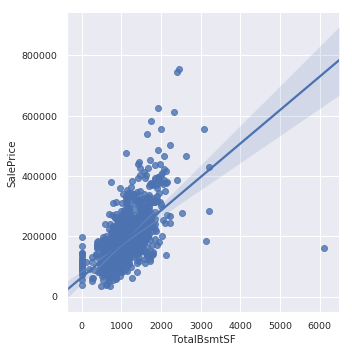

In [32]:
fig = plt.figure(figsize=(10, 5))
sns.lmplot(x=var, y = 'SalePrice', data=data)

Nhận xét: 
1. GrLivArea có vẻ linear hơn TotalBsmtSF so với SalePrice.
2. GrLivArea và TotalBsmtSF điều có nhiễu(góc dưới bênh phải) cần phải loại bỏ.

In [33]:
df_train['1stFlrSF'].describe()

count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


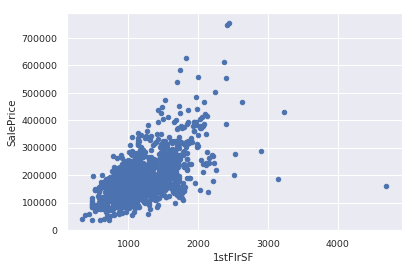

In [34]:
data = pd.concat([df_train['1stFlrSF'], df_train['SalePrice']], axis=1)
data.plot.scatter(x='1stFlrSF', y='SalePrice')

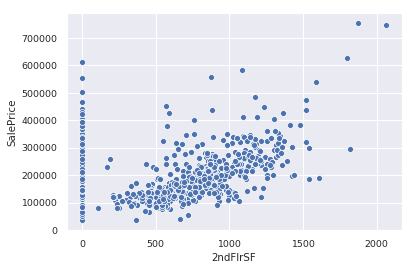

In [35]:
sns.scatterplot(x='2ndFlrSF', y = 'SalePrice', data=pd.concat([df_train['2ndFlrSF'], df_train['SalePrice']], axis=1))

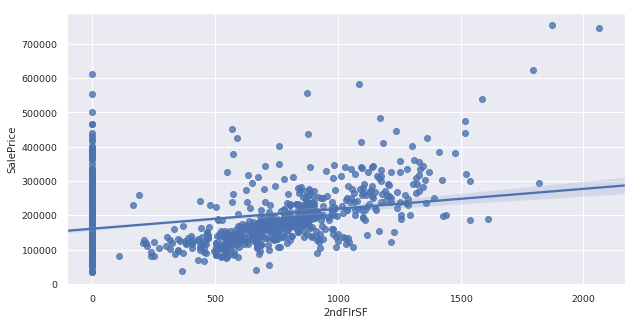

In [36]:
fig = plt.figure(figsize=(10,5))
sns.regplot(x='2ndFlrSF', y='SalePrice', data=pd.concat([df_train['2ndFlrSF'], df_train['SalePrice']], axis=1))

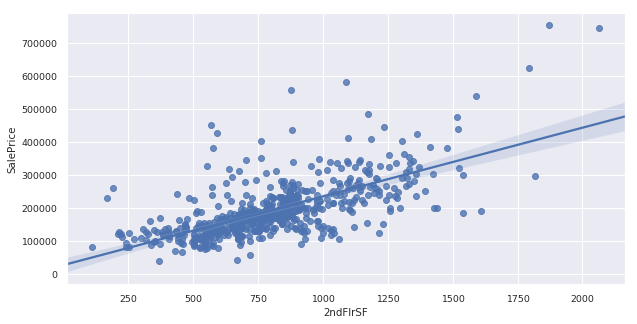

In [37]:
fig = plt.figure(figsize=(10,5))
data = pd.concat([df_train[df_train['2ndFlrSF'] != 0]['2ndFlrSF'], df_train[df_train['2ndFlrSF'] != 0]['SalePrice']], axis=1)
sns.regplot(x='2ndFlrSF', y='SalePrice', data=data)

Khảo sát độ lệch độ lệch:

In [38]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [39]:
df_train[cols].skew().sort_values(ascending=False)

SalePrice       1.882876
TotalBsmtSF     1.524255
1stFlrSF        1.376757
GrLivArea       1.366560
TotRmsAbvGrd    0.676341
OverallQual     0.216944
GarageArea      0.179981
FullBath        0.036562
GarageCars     -0.342549
YearBuilt      -0.613461
dtype: float64

In [40]:
num_feature = df_train.dtypes[df_train.dtypes != 'object'].index
num_skew = df_train[num_feature].skew().sort_values(ascending=False)

In [41]:
num_skew

MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchenAbvGr      4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
MasVnrArea        2.669084
OpenPorchSF       2.364342
LotFrontage       2.163569
SalePrice         1.882876
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
MSSubClass        1.407657
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
OverallCond       0.693067
TotRmsAbvGrd      0.676341
HalfBath          0.675897
Fireplaces        0.649565
BsmtFullBath      0.596067
OverallQual       0.216944
MoSold            0.212053
BedroomAbvGr      0.211790
GarageArea        0.179981
YrSold            0.096269
FullBath          0.036562
Id                0.000000
GarageCars       -0.342549
YearRemodAdd     -0.503562
YearBuilt        -0.613461
G

5 feature có độ lệch lớn
- MiscVal          24.476794 (các tính năng đặc biệt)
- PoolArea         14.828374 (diện tích hồi bơi)
- LotArea          12.207688 (tổng diện tích khu đất ở)
- 3SsnPorch        10.304342 (diện tích mái hiên bao quanh theo 3 mùa)
- LowQualFinSF      9.011341 (diện tích sàn có chất lượng thấp của tất cả các tầng)

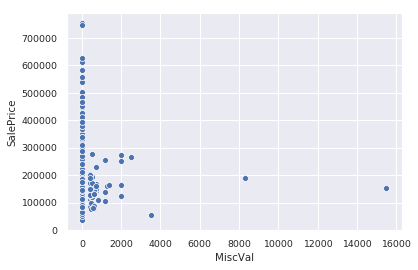

In [43]:
sns.scatterplot(x='MiscVal', y='SalePrice', data=pd.concat([df_train.MiscVal, df_train.SalePrice], axis=1))

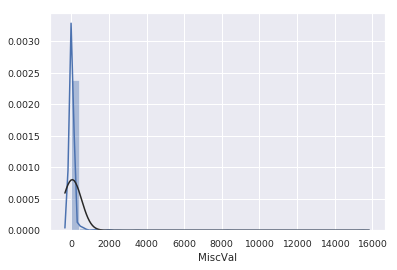

In [44]:
sns.distplot(df_train.MiscVal, fit=norm)

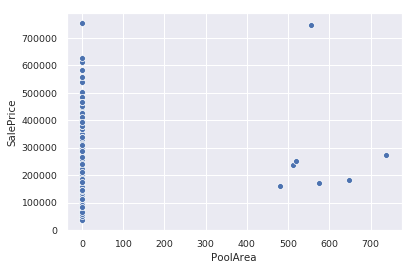

In [45]:
sns.scatterplot(x='PoolArea', y='SalePrice', data=pd.concat([df_train.PoolArea, df_train.SalePrice], axis=1))

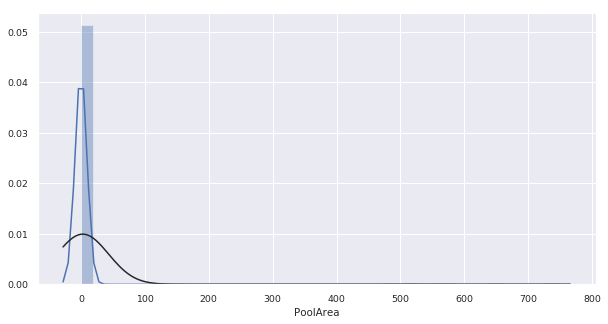

In [46]:
fig = plt.figure(figsize=(10,5))
sns.distplot(df_train.PoolArea, fit=norm)

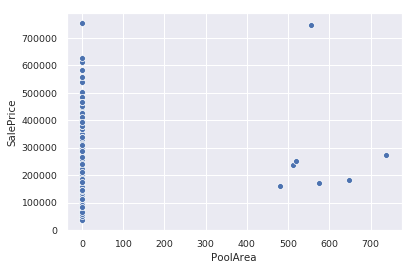

In [47]:
sns.scatterplot(x='PoolArea',y='SalePrice', data=pd.concat([df_train.PoolArea, df_train.SalePrice], axis=1))

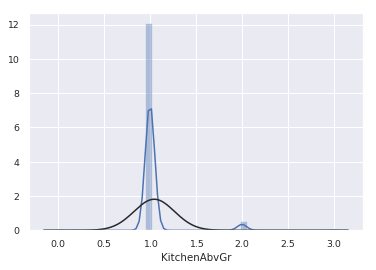

In [48]:
sns.distplot(df_train.KitchenAbvGr, fit=norm)

Độ nhọn

In [49]:
num_feat = df_train.dtypes[df_train.dtypes !='object'].index
num_kurt = df_train[num_feature].kurt().sort_values(ascending =False)

In [50]:
num_kurt

MiscVal          701.003342
PoolArea         223.268499
LotArea          203.243271
3SsnPorch        123.662379
LowQualFinSF      83.234817
KitchenAbvGr      21.532404
BsmtFinSF2        20.113338
ScreenPorch       18.439068
LotFrontage       17.452867
BsmtHalfBath      16.396642
TotalBsmtSF       13.250483
BsmtFinSF1        11.118236
EnclosedPorch     10.430766
MasVnrArea        10.082417
OpenPorchSF        8.490336
SalePrice          6.536282
1stFlrSF           5.745841
GrLivArea          4.895121
WoodDeckSF         2.992951
BedroomAbvGr       2.230875
MSSubClass         1.580188
OverallCond        1.106413
GarageArea         0.917067
TotRmsAbvGrd       0.880762
BsmtUnfSF          0.474994
GarageCars         0.220998
OverallQual        0.096293
Fireplaces        -0.217237
MoSold            -0.404109
GarageYrBlt       -0.418341
YearBuilt         -0.439552
2ndFlrSF          -0.553464
BsmtFullBath      -0.839098
FullBath          -0.857043
HalfBath          -1.076927
YrSold            -1

5 thuộc tính có độ nhọn lớn(giống như độ lệch)
- MiscVal          701.003342
- PoolArea         223.268499
- LotArea          203.243271
- 3SsnPorch        123.662379
- LowQualFinSF      83.234817

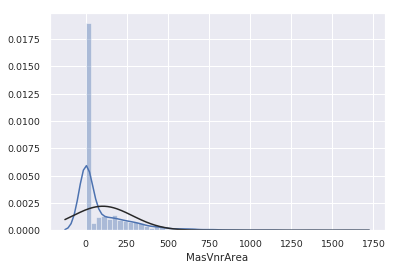

In [51]:
sns.distplot(df_train[df_train['MasVnrArea'].isnull() != True]['MasVnrArea'], fit=norm)

### Relationship with categorical features

In [52]:
#df_train.dtypes

In [58]:
df_cate_feature =df_train.dtypes[df_train.dtypes == 'object'].index

##### OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

In [59]:
df_cate_feature

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [62]:
var = 'OverallQual'
df_train[var].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [63]:
df_train[var].describe()

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64

std : độ lệch chuẩn.

Cách vẽ:

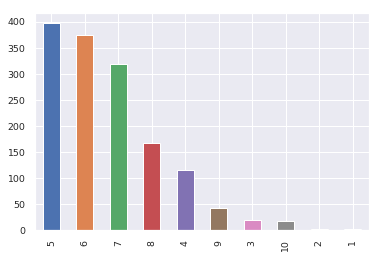

In [64]:
df_train[var].value_counts().plot(kind ='bar')

Hàm sns.countplot(data): hàm này truyền vào data origin, nó sẽ tự đếm số lượng rồi vẽ biểu đồ, giống như thuật toán lừa bò vào chuồng.

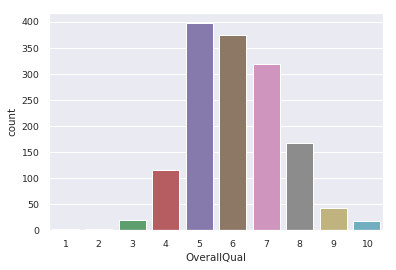

In [65]:
sns.countplot(df_train[var])

In [66]:
sum(df_train[var].value_counts())

1460

In [67]:
data = pd.concat([df_train[var], df_train['SalePrice']], axis=1)

In [68]:
df_train['OverallQual'].head()

0    7
1    6
2    7
3    7
4    8
Name: OverallQual, dtype: int64

Biểu đồ hộp cạnh – kề – cạnh(Boxplot):
1. Biểu đồ hộp cung cấp một dạng trình bày tóm tắt về phân phối của dữ liệu bằng cách cho ta thấy trên đồ thị các phân vị của dữ liệu.
2. Biểu đồ hộp cho biết trung tâm của phân phối (tức median hoặc phân vị thứ 50, Q 0.50 ), độ phân tán (spread) của toàn bộ dữ liệu (tức độ dài của hộp, là khoảng cách từ phân vị thứ 25 (Q 0.25 ) đến phân vị thứ 75 (Q 0.75 )), và các đuôi (tails) của phân phối được trải ra như thế nào (tức độ dài của các ‘râu’ so với hai đáy của chiếc hộp hình chữ nhật)
3. Bất cứ các điểm dữ liệu nào nằm ngoài khoảng của hai giá trị liền kề được gọi là các giá trị ngoại lai (outside values) hoặc cá biết, bất thường (outliers), vàđược vẽ như là một điểm riêng lẻ.

Cách dùng:
Các biểu đồ hộp cạnh – kề – cạnh là một tập hợp các biểu đồ hộp trình bày các phân phối của một số trường hợp hoặc một số biến theo một cách mà chúng ta có thể so sánh không chỉ các thước đo trung tâm mà còn các phân phối của các biến. Như chúng tôi đã đề cập ở trên, bề rộng của các biểu đồ hộp thường là tùy ý để chúng có thể được chia tỷ lệ theo một cách mà chúng ta có thể đặt chúng kế nhau miễn là các khoảng giá trị là tương tự về độ lớn để chúng có thể được vẽ trên cùng một trục tung.

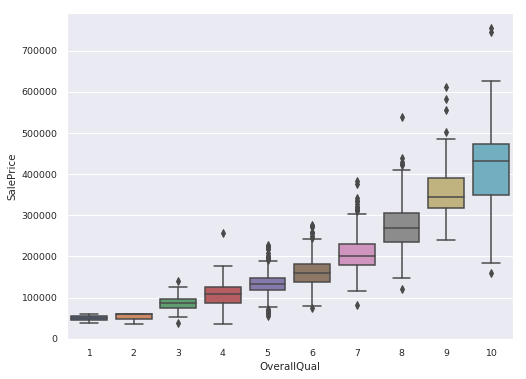

In [69]:
plt.subplots(figsize=(8,6))
sns.boxplot(x=var, y='SalePrice', data =data)

<Figure size 504x504 with 0 Axes>

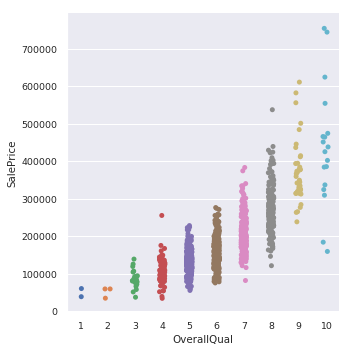

In [76]:
fig = plt.figure(figsize=(7,7))
sns.catplot(x=var, y ='SalePrice', data=data)
plt.show()

So sánh giữa OverallQual 8 và 9

In [122]:
#df_train[(df_train['OverallQual']  == 10) |  (df_train['OverallQual']  == 9)]['GrLivArea']

In [132]:
data =pd.concat([df_train[(df_train['OverallQual']  == 8) | (df_train['OverallQual']  == 9)]['GrLivArea'], 
                 df_train[(df_train['OverallQual']  == 8) | (df_train['OverallQual']  == 9)]['SalePrice'],
                df_train[(df_train['OverallQual']  == 8) | (df_train['OverallQual']  == 9)]['OverallQual']], axis=1)

In [133]:
data.head()

,GrLivArea,SalePrice,OverallQual
4,2198,250000,8
6,1694,307000,8
11,2324,345000,9
20,2376,325300,8
22,1795,230000,8


<Figure size 720x504 with 0 Axes>

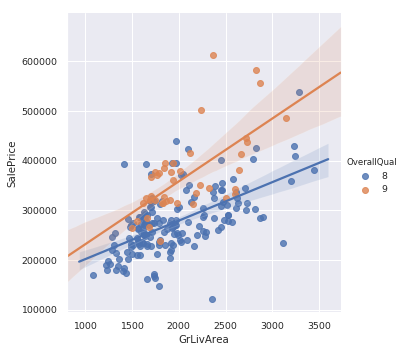

In [134]:
fig = plt.figure(figsize=(10,7))
sns.lmplot(x='GrLivArea', y='SalePrice', hue=var,
           data=data)

So sánh giữa OverallQual 9 và 10

In [143]:
data =pd.concat([df_train[(df_train['OverallQual']  == 10) | (df_train['OverallQual']  == 9)]['GrLivArea'], 
                 df_train[(df_train['OverallQual']  == 10) | (df_train['OverallQual']  == 9)]['SalePrice'],
                df_train[(df_train['OverallQual']  == 10) | (df_train['OverallQual']  == 9)]['OverallQual']], axis=1)

In [153]:
fig = plt.figure(figsize=(10,7))
sns.lmplot(x='GrLivArea', y='SalePrice', hue=var,
           data=data)

KeyError: "['BsmtFinType1'] not in index"

<Figure size 720x504 with 0 Axes>

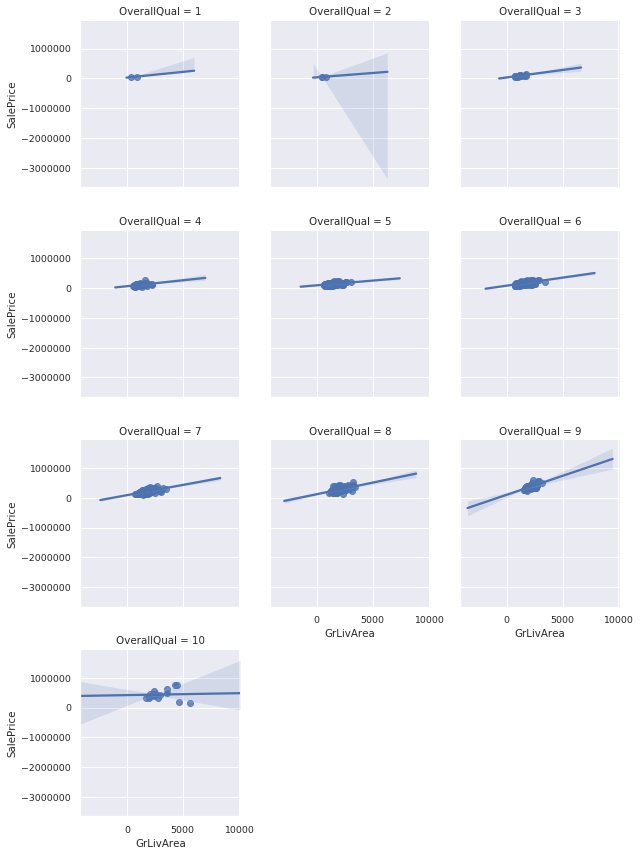

In [149]:
sns.lmplot(x='GrLivArea', y='SalePrice', col='OverallQual',data=df_train, col_wrap=3, height=3)

Nhận xét:
1. Đa phần điểm OverallQual tăng thì SalePrice nhà tăng theo.
2. Có nhiều outlayer.
3. Tại OverallQual bằng 10 SalePrice ít phụ thuộc vào điểm, có khi OverallQual = 10 lại có SalePrice thấp hơn SalePrice = 9. 
4. Có thể LabelEncoder 5,6,7,8,9 và dumpy 10, 1,2,3,4 

In [137]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)

In [138]:
#df_train[var].value_counts()

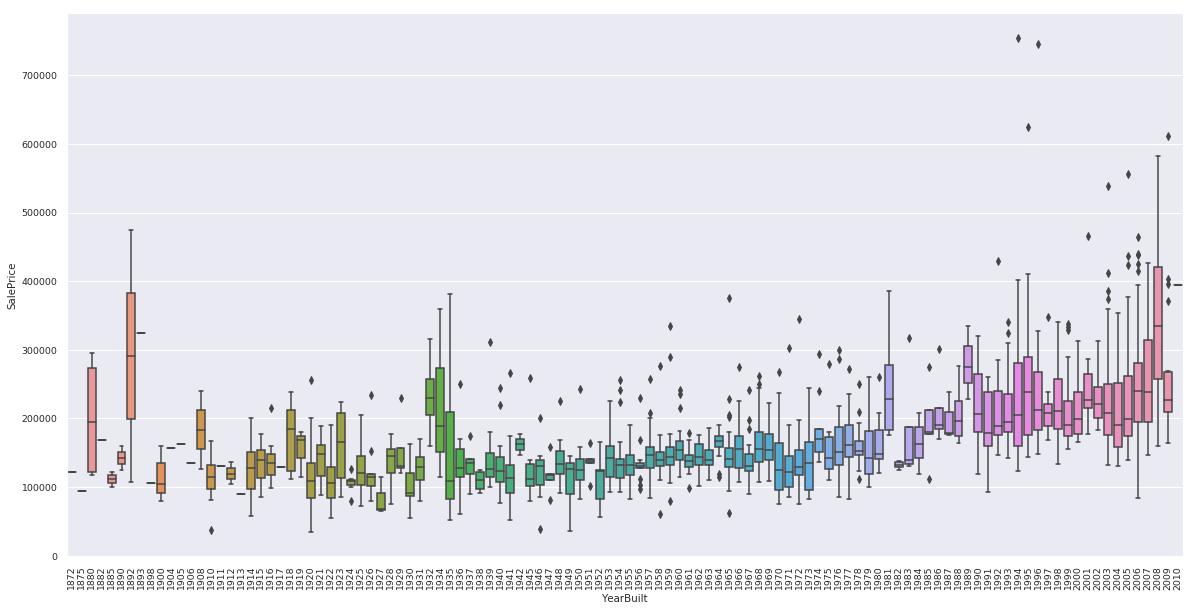

In [139]:
plt.subplots(figsize=(20,10))
sns.boxplot(x=var, y='SalePrice', data=data)
plt.xticks(rotation=90);#xoay tiêu đề trục x 90độ

SalePrice còn phụ thuộc vào một sô ngôi nhà đã cũ.

Kết luận:
1. GrLivArea và TotalBsmtSF điều linear với SalePrice.
2. TotalBsmtSF linear dốc hơn so vơi GrLivArea(tốc độ tăng salePrice nhanh hơn).
3. 'OverallQual' và 'YearBuilt' có ảnh hưởng tới SalePrice, 'OverallQual' có ảnh hưởng nhiều hơn 'YearBuilt'.

BsmtFinType1: Rating of basement finished area(đánh giá chất lượng tầng đã hoàn thành)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

AttributeError: 'AxesSubplot' object has no attribute 'map'

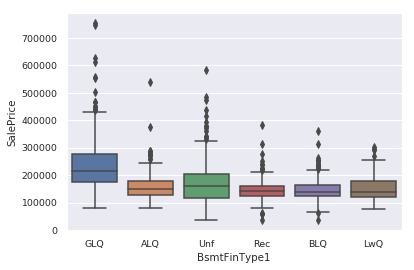

In [168]:
var = 'BsmtFinType1'
#fig, axes = plt.subplots(nrows=0, ncols= 2)
g = sns.boxplot(x=var, y='SalePrice', data=df_train)
g.map(sns.catplot,x=var, y='SalePrice', data=df_train)
g.add_legend()

##### Biểu đồ tương quan(heatmap()):
    r = Cov(x,y)/(s(x)*s(y)) #s(x) độ lệch chuẩn của x.
Hệ số tương quan (correlation coefficient) là một thống kê phổ biến nhất được sử dụng để lượng hóa mối quan hệ giữa hai biến x và y.Giá trị tương quan(r) nằm giữa – 1 đến + 1, và đo lường mối quan hệ tuyến tính giữa x và y. Nếu r = 0, thì không có mối quan hệ tuyến tính nào; nếu r = 1, thì có mối quan hệ tuyến tính dương hoàn hảo; và nếu r = - 1, thì có mối quan hệ tuyến tính âm hoàn hảo.

In [170]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

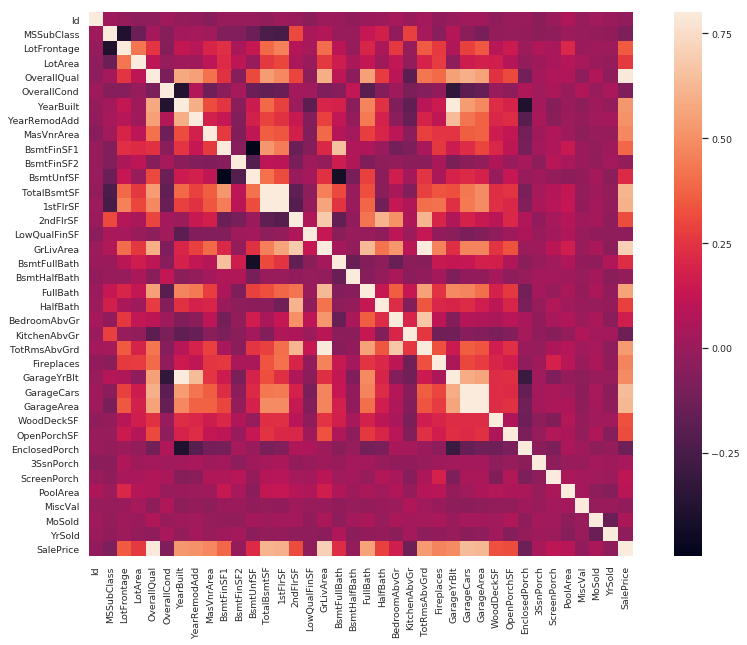

In [171]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize = (15,10))
sns.heatmap(corrmat, square=True, vmax=.8)

In [172]:
#saleprice correlation matrix
k = 10
#help(corrmat.nlargest)

10 thành phần tương quan tuyến tính dương với SalePrice nhất.

In [173]:
#help(sns.heatmap)

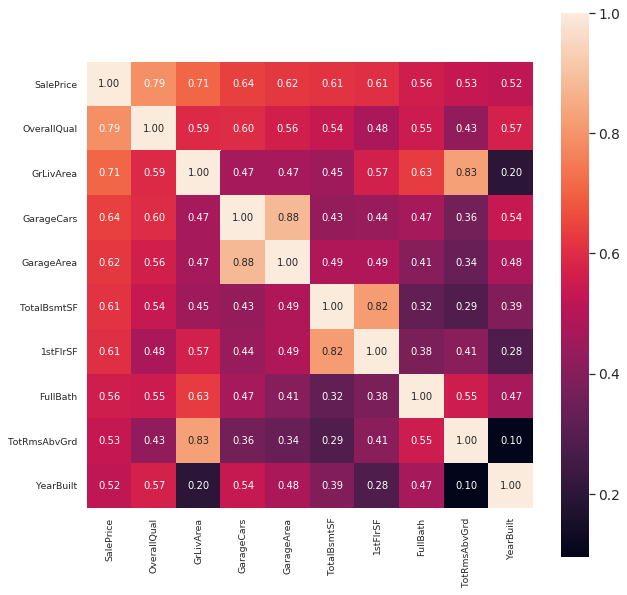

In [174]:
cols =corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
f, ax = plt.subplots(figsize=(10,10))
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, square=True,fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

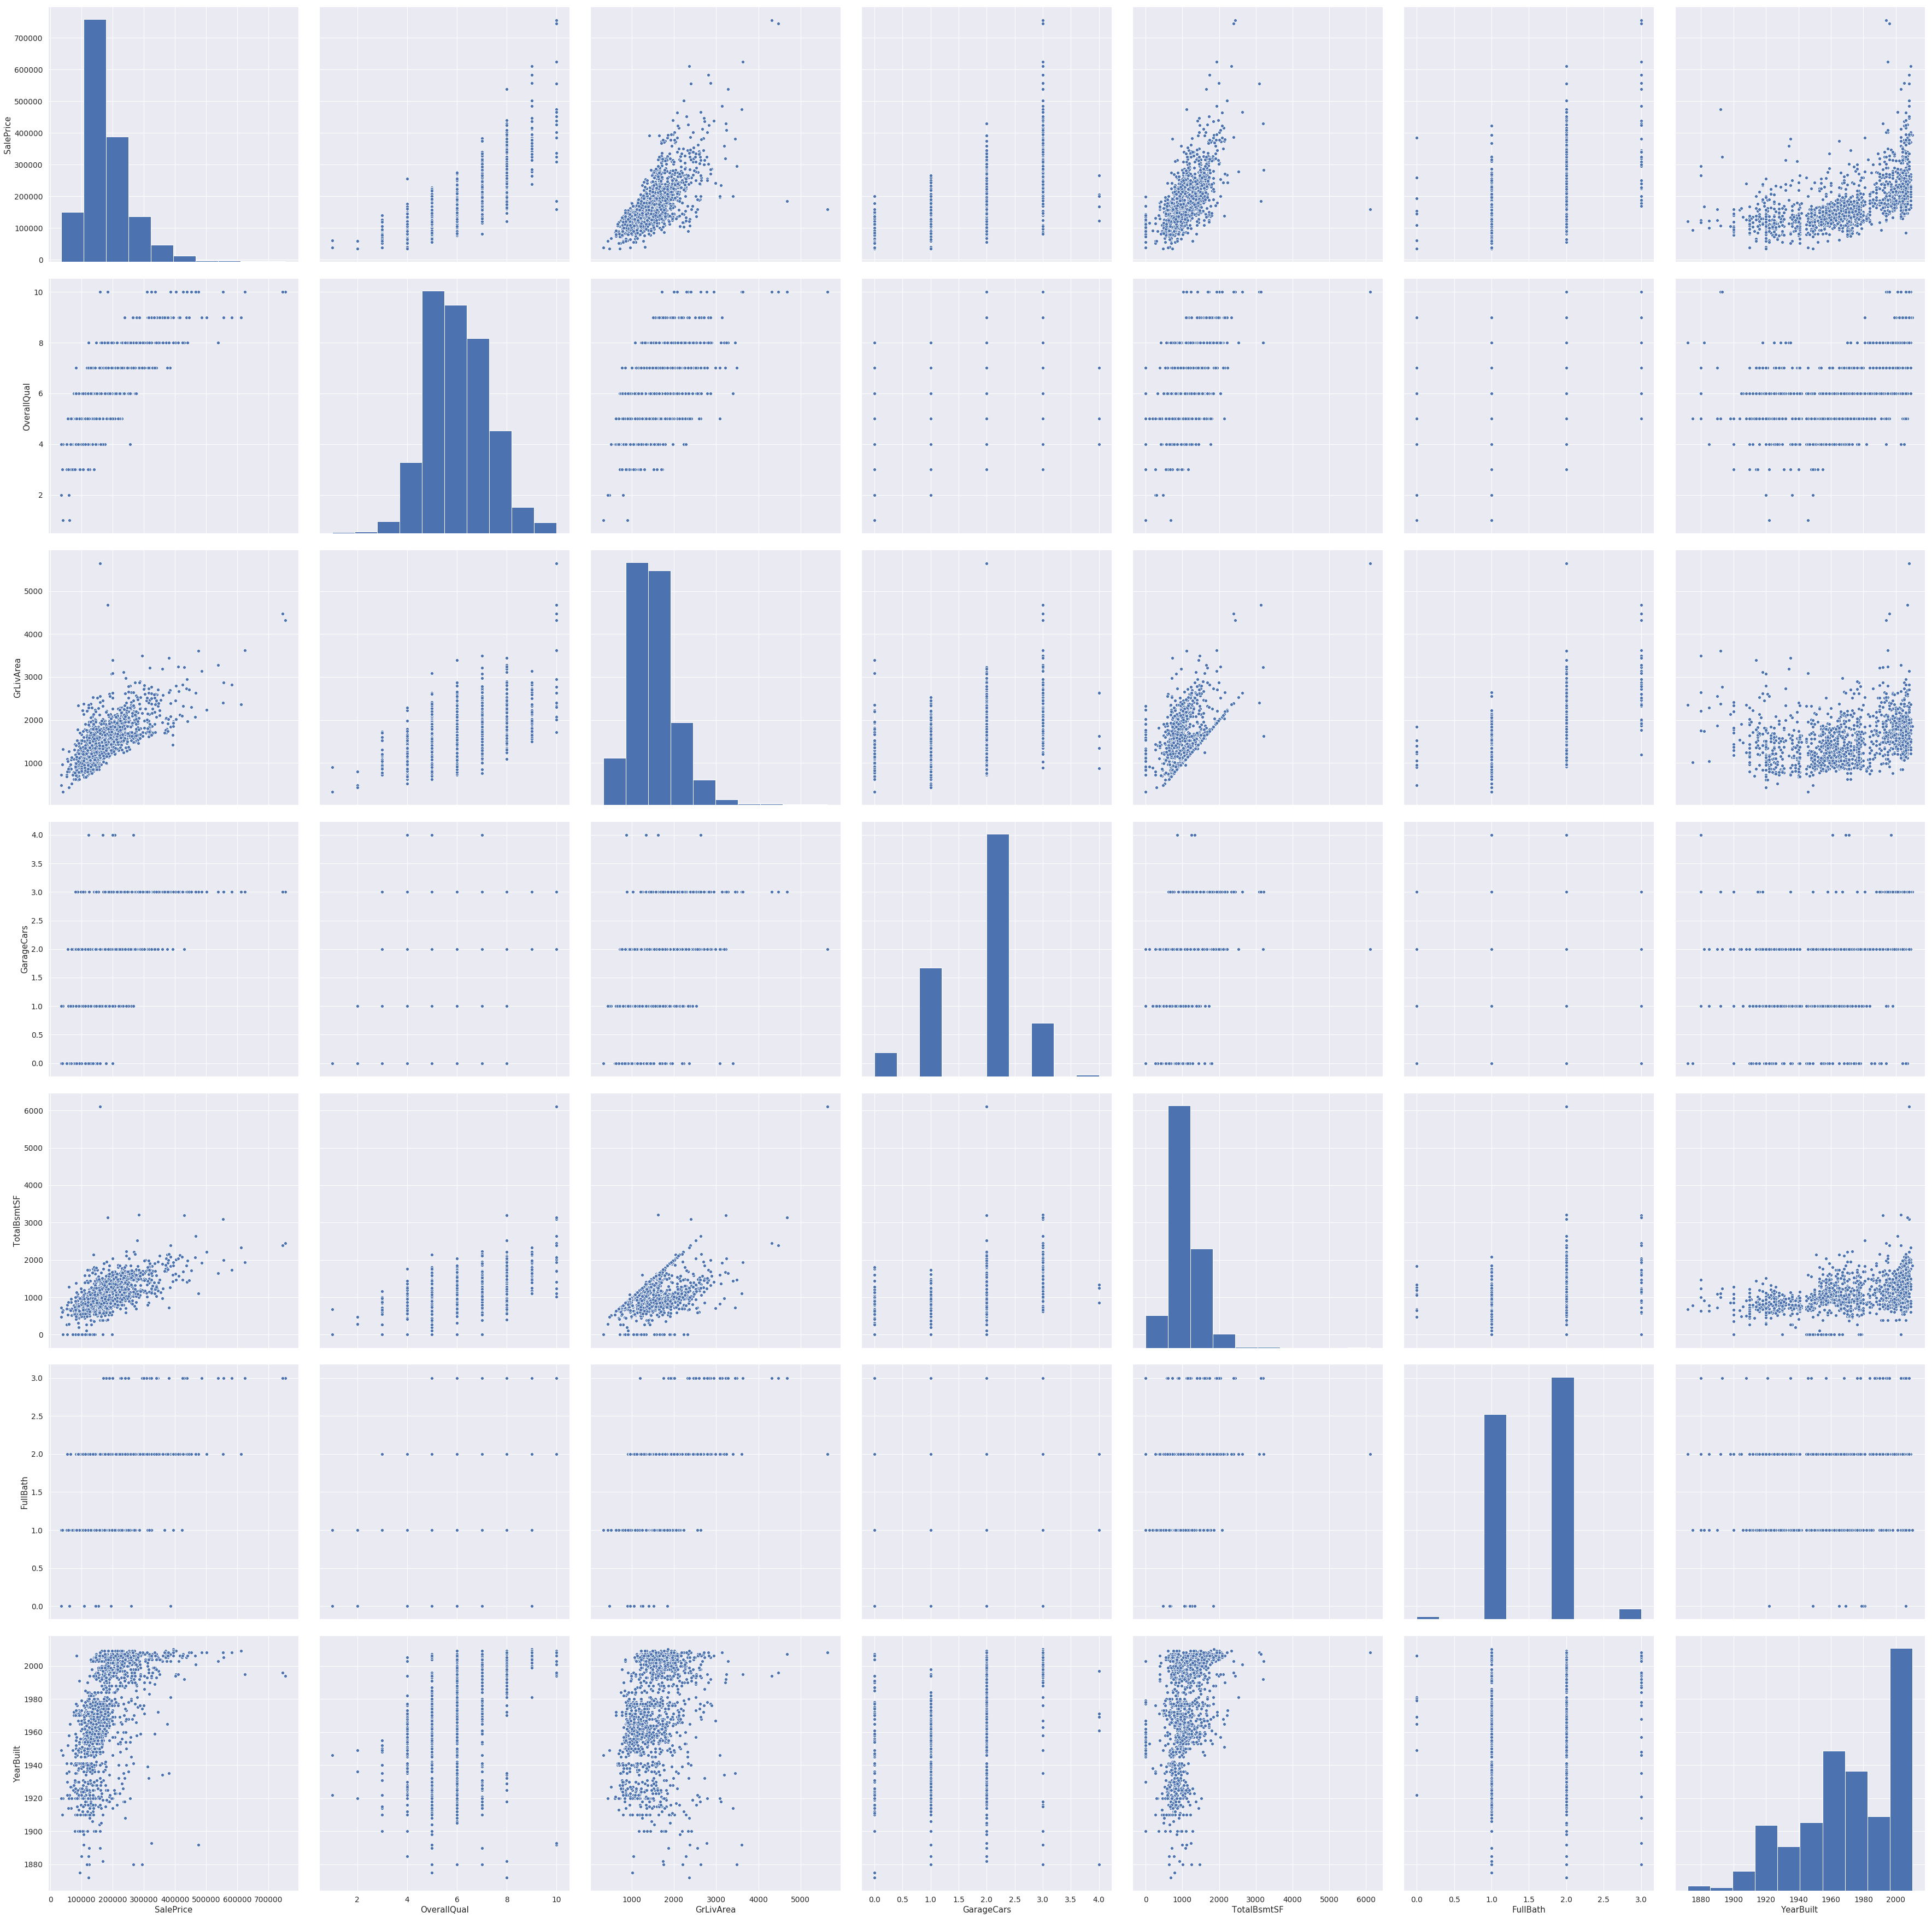

In [175]:
#scatterplot
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size=7)
plt.show()

## Missing data

In [176]:
total = df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


1. PoolQC: Pool quality
2. MiscFeature: Miscellaneous feature not covered in other categories
3. Alley: Type of alley access to property
4. Fence: Fence quality
5. FireplaceQu: Fireplace quality

In [177]:
missing_data[missing_data['Total'] != 0.0].count()

Total      19
Percent    19
dtype: int64

In [178]:
missing_data.shape

(81, 2)

In [179]:
#df_train['PoolQC']

In [180]:
df_train = df_train.drop((missing_data[missing_data['Total']>1]).index, 1)
df_test = df_test.drop((missing_data[missing_data['Total']>1]).index, 1)

df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

Missing Value in df_test

In [181]:
total = df_test.isnull().sum().sort_values(ascending = False)
percent = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
MSZoning,4,0.002742
BsmtHalfBath,2,0.001371
BsmtFullBath,2,0.001371
Functional,2,0.001371
Utilities,2,0.001371
Exterior2nd,1,0.000685
KitchenQual,1,0.000685
GarageCars,1,0.000685
GarageArea,1,0.000685
BsmtFinSF1,1,0.000685


In [182]:
l_miss = (missing_data[missing_data['Total']>0]).index

In [183]:
l_miss

Index(['MSZoning', 'BsmtHalfBath', 'BsmtFullBath', 'Functional', 'Utilities',
       'Exterior2nd', 'KitchenQual', 'GarageCars', 'GarageArea', 'BsmtFinSF1',
       'SaleType', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'Exterior1st'],
      dtype='object')

In [184]:
#for miss in l_miss:
#    df_test[df_test.loc[df_test[miss].isnull()].index] = df_test[miss].mean(skipna=True)
    #df_test = df_test.drop(df_train.loc[df_train['Electrical'].isnull()].index)

In [185]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df_test[col] = df_test[col].fillna(0)

In [186]:
df_test['MSZoning'] = df_test['MSZoning'].fillna(df_test['MSZoning'].mode()[0])

In [187]:
df_test["Functional"] = df_test["Functional"].fillna("Typ")

In [188]:
df_test = df_test.drop(['Utilities'], axis=1)
df_train = df_train.drop(['Utilities'], axis=1)

In [189]:
df_test['Exterior1st'] = df_test['Exterior1st'].fillna(df_test['Exterior1st'].mode()[0])
df_test['Exterior2nd'] = df_test['Exterior2nd'].fillna(df_test['Exterior2nd'].mode()[0])

In [190]:
df_test['SaleType'] = df_test['SaleType'].fillna(df_test['SaleType'].mode()[0])

In [191]:
df_test['KitchenQual'] = df_test['KitchenQual'].fillna(df_test['KitchenQual'].mode()[0])

In [192]:
for col in ('GarageArea', 'GarageCars'):
    df_test[col] = df_test[col].fillna(0)

In [193]:

#df_test = df_test.drop(df_test.loc[df_test[(missing_data[missing_data['Total']>1]).index].isnull()].index)
#df_test = df_test.drop(df_test.loc[df_test[(missing_data[missing_data['Total'] > 0]).index].isnull()].index)
#df_test = df_test.drop((missing_data[missing_data['Total']>=1]).index, 1)
df_test.isnull().sum().max()

0

In [194]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [195]:
df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [196]:
#df_train.LandSlope

In [197]:
df_test.shape

(1459, 61)

In [198]:
df_train.shape

(1459, 62)

#### Transforming some numerical variables that are really categorical

In [199]:
#MSSubClass=The building class
df_train['MSSubClass'] = df_train['MSSubClass'].apply(str)
df_test['MSSubClass'] = df_test['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
df_train['OverallCond'] = df_train['OverallCond'].astype(str)
df_test['OverallCond'] =df_test['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
df_train['YrSold'] = df_train['YrSold'].astype(str)
df_train['MoSold'] = df_train['MoSold'].astype(str)
df_test['YrSold'] = df_test['YrSold'].astype(str)
df_test['MoSold'] = df_test['MoSold'].astype(str)

#### Label Encoding some categorical variables that may contain information in their ordering set

In [200]:
#column with type is categorical
cols = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold']

In [201]:
a = df_train.columns.isin(cols)
np.where(a == True)

(array([ 1,  4,  5,  8, 15, 22, 23, 30, 31, 43, 45, 49, 57, 58]),)

In [202]:
#column remain after drop
cols_pre = df_train.columns[np.where(a == True)]

In [203]:
cols_pre

Index(['MSSubClass', 'Street', 'LotShape', 'LandSlope', 'OverallCond',
       'ExterQual', 'ExterCond', 'HeatingQC', 'CentralAir', 'KitchenQual',
       'Functional', 'PavedDrive', 'MoSold', 'YrSold'],
      dtype='object')

In [204]:
from sklearn.preprocessing import LabelEncoder

In [205]:
lbl = LabelEncoder()

In [206]:
df_test.columns.isin(cols_pre)

array([False,  True, False, False,  True,  True, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False, False,  True, False, False, False, False,
       False, False, False,  True,  True, False, False])

In [207]:
t = 0
for x in df_test.columns.isin(cols_pre):
    if x == True:
        t += 1
print(t)

14


In [208]:
cols_pre.size

14

In [209]:
# process columns, apply LabelEncoder to categorical features
for c in cols_pre:
    lbl_t = LabelEncoder()
    lbl_d = LabelEncoder()
    lbl_t.fit(list(df_train[c].values)) 
    lbl_d.fit(list(df_test[c].values)) 
    df_train[c] = lbl_t.transform(list(df_train[c].values))
    df_test[c] = lbl_d.transform(list(df_test[c].values))

# shape        
print('Shape data train: {}'.format(df_train.shape))
print('Shape data test: {}'.format(df_test.shape))

Shape data train: (1459, 62)
Shape data test: (1459, 61)


In [210]:
#df_train.KitchenQual

In [211]:
df_train.LandSlope.value_counts()

0    1381
1      65
2      13
Name: LandSlope, dtype: int64

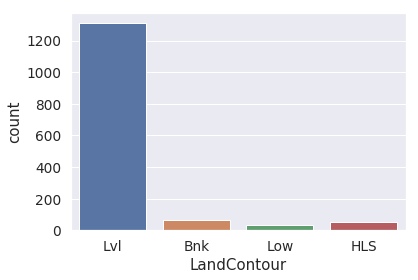

In [213]:
sns.countplot(df_train.LandContour)

In [214]:
df_train.shape

(1459, 62)

In [215]:
df_train['SalePrice'].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [216]:
np.where(df_train.dtypes != 'object')

(array([ 0,  1,  3,  4,  5,  8, 14, 15, 16, 17, 22, 23, 25, 26, 27, 28, 30,
        31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,
        49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 61]),)

In [217]:
df_train.columns[np.where(df_train.dtypes != 'object')]

Index(['Id', 'MSSubClass', 'LotArea', 'Street', 'LotShape', 'LandSlope',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'ExterQual',
       'ExterCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [218]:
numeric_feats = df_train.dtypes[df_train.dtypes != "object"].index

In [219]:
numeric_feats

Index(['Id', 'MSSubClass', 'LotArea', 'Street', 'LotShape', 'LandSlope',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'ExterQual',
       'ExterCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [220]:
df_test.shape

(1459, 61)

In [221]:
df_train.shape

(1459, 62)

#### Check skew feature

In [222]:
from scipy.stats import skew
# Check the skew of all numerical features
skewed_feats = df_train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,24.443278
PoolArea,14.807992
LotArea,12.190881
3SsnPorch,10.290132
LowQualFinSF,8.998885
LandSlope,4.806884
KitchenAbvGr,4.482026
BsmtFinSF2,4.249219
ScreenPorch,4.116334
BsmtHalfBath,4.097541


#### MiscVal: $Value of miscellaneous feature

In [223]:
df_train.MiscVal.value_counts()

0        1407
400        11
500         8
700         5
450         4
2000        4
600         4
1200        2
480         2
1150        1
800         1
15500       1
620         1
3500        1
560         1
2500        1
1300        1
1400        1
350         1
8300        1
54          1
Name: MiscVal, dtype: int64

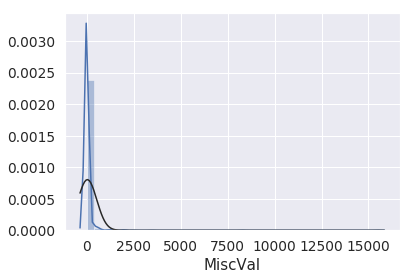

In [224]:
sns.distplot(df_train.MiscVal, fit=norm)

In [225]:
df_train.MiscVal.skew()

24.468441010668204

Độ nhọn(skew) của MiscVal quá cao so với chuẩn( skew chuẩn là 3).

In [226]:
from scipy.special import boxcox1p
sk = boxcox1p(df_train.MiscVal, 0.15)

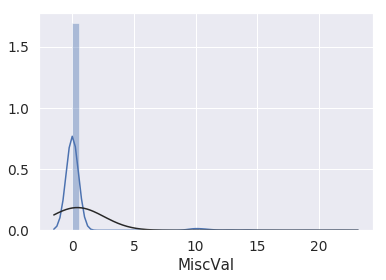

In [227]:
sns.distplot(sk, fit=norm)

In [228]:
sk.skew()

5.50912746811769

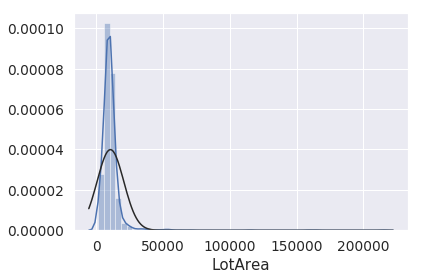

In [229]:
sns.distplot(df_train.LotArea, fit=norm)

In [230]:
sk_lotArea = boxcox1p(df_train.LotArea, 0.15)

In [231]:
df_train.LotArea.dropna().skew()

12.203431161608322

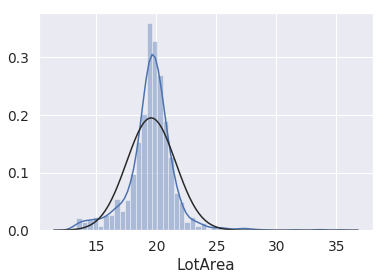

In [232]:
sns.distplot(sk_lotArea, fit=norm)

In [233]:
df_train.MSZoning.value_counts()

RL         1150
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [234]:
#help(StandardScaler().fit_transform)

In [235]:
np.newaxis

In [236]:
df_test.shape

(1459, 61)

In [237]:
df_train.shape

(1459, 62)

#### Getting dummy categorical features

In [238]:
#df_train = pd.get_dummies(df_train)
#df_test = pd.get_dummies(df_test)
#print('shape of data train: ', df_train.shape)
#print('shape of data test: ', df_test.shape)

In [239]:
df_train.columns[np.where(df_train.columns.isin(df_test.columns) == False)]

Index(['SalePrice'], dtype='object')

In [240]:
#help(pd.get_dummies)

### Out liars!

Chuẩn hóa các dữ liệu thành có giá trị trung bình là 0 và độ lệch chuẩn là 1.

Chuẩn hóa giúp cho hội tụ nhanh hơn(nguyên nhân lên course machine learning Andrew Ng coi).

Độ lệch chuẩn, hay độ lệch tiêu chuẩn, là một đại lượng thống kê mô tả dùng để đo mức độ phân tán của một tập dữ liệu đã được lập thành bảng tần số. Có thể tính ra độ lệch chuẩn bằng cách lấy căn bậc hai của phương sai.

#### Univariate analysis

In [241]:
#standardring data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:, np.newaxis])

In [242]:
saleprice_scaled

array([[ 0.34704187],
       [ 0.0071701 ],
       [ 0.53585953],
       ...,
       [ 1.07713679],
       [-0.48847623],
       [-0.42081658]])

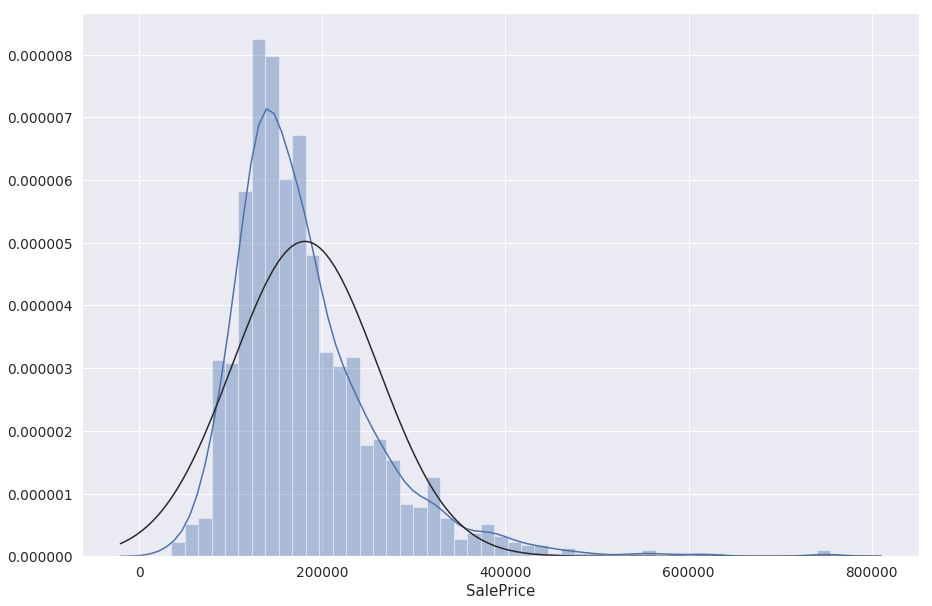

In [243]:
fig = plt.figure(figsize= (15,10))
sns.distplot(df_train['SalePrice'], fit=norm)

In [244]:
saleprice_scaled.shape

(1459, 1)

In [245]:
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]

In [246]:
saleprice_scaled.mean()

3.896053383194518e-17

In [247]:
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


#### Bivariate analysis


In [248]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)

In [249]:
data.shape

(1459, 2)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


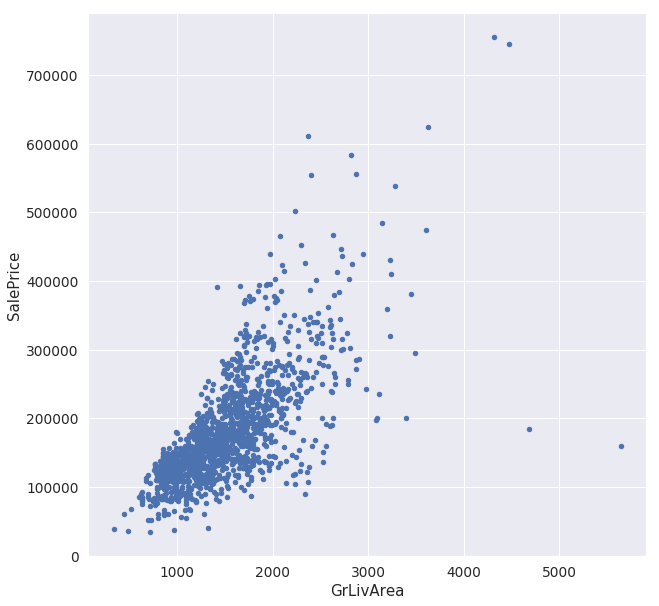

In [250]:
data.plot.scatter(x = var, y = 'SalePrice', figsize = (10,10))

nhận xét:
1. 2 điểm xanh có GrLivArea lớn và giá thấp đó chính là outlier 
2. 2 điểm xanh có GrLivArea cỡ 4200 và SalePrice cao nhất đó có thể là 2 điểm mà khi chuẩn hóa thành saleprice_scaled có giá trị >7.0

In [251]:
#deleting point
#help(df_train.sort_values)

In [252]:
df_train.sort_values(by='GrLivArea', ascending=False)[:2] #df_train chi sort va hien ra, gia tri va vi tri cua van ko thya doi

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,9,RL,63887,1,2,Bnk,Corner,0,Edwards,...,0,0,0,480,0,0,2,New,Partial,160000
523,524,9,RL,40094,1,0,Bnk,Inside,0,Edwards,...,0,0,0,0,0,1,1,New,Partial,184750


In [253]:
df_train[['Id','GrLivArea']].head()

,Id,GrLivArea
0,1,1710
1,2,1262
2,3,1786
3,4,1717
4,5,2198


In [254]:
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

In [255]:
df_train[df_train['Id'] == 1299]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


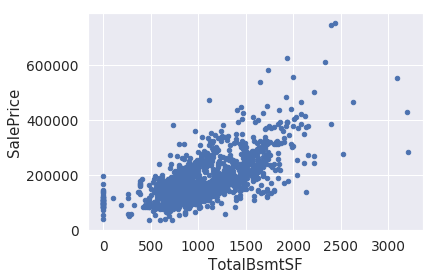

In [256]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x= var, y= 'SalePrice')

In [257]:
#delete data
df_train.sort_values(by='TotalBsmtSF', ascending=False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
332,333,4,RL,10655,1,0,Lvl,Inside,0,NridgHt,...,0,0,0,0,0,1,3,WD,Normal,284000
496,497,4,RL,12692,1,0,Lvl,Inside,0,NoRidge,...,291,0,0,0,0,7,1,WD,Normal,430000


### Getting hard core

#### In the search for normality

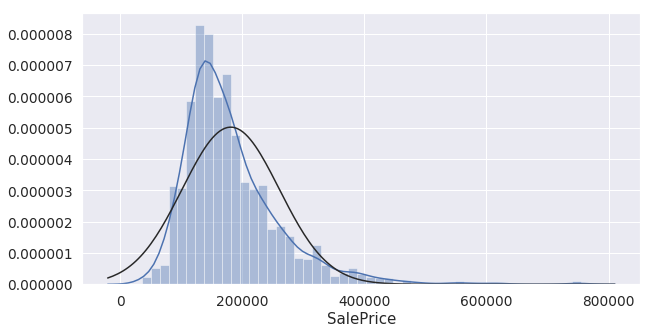

In [258]:
#histogram and normal probability plot
fig =plt.figure(figsize=(10,5))
sns.distplot(df_train['SalePrice'], fit=norm)


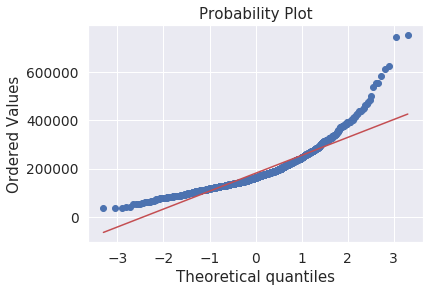

In [259]:
res = stats.probplot(df_train['SalePrice'], plot=plt)

Skewness(độ nghiêng) dương(nghiêng sang trái) và các điểm ko đi theo đường chéo

In [260]:
#tranformation follow log
df_train['SalePrice'] =np.log(df_train['SalePrice'])

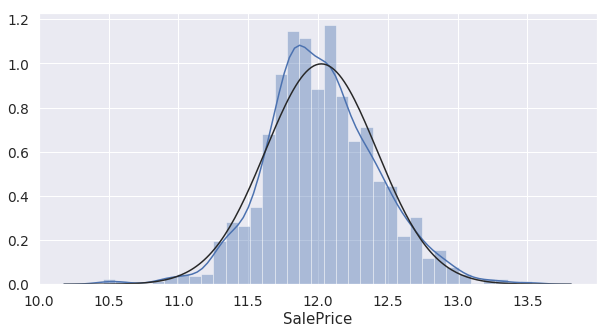

In [261]:
fig = plt.figure(figsize = (10,5))
sns.distplot(df_train['SalePrice'], fit=norm)

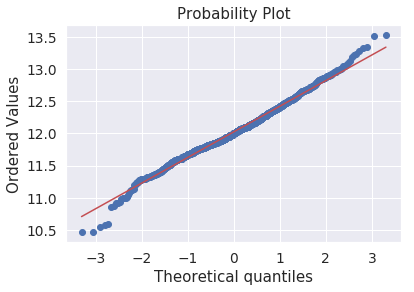

In [262]:
res = stats.probplot(df_train['SalePrice'], plot=plt)

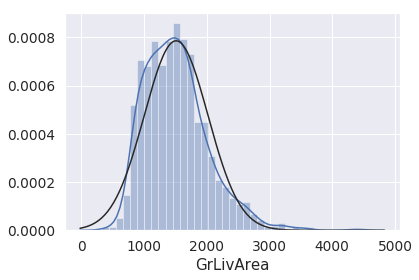

In [263]:
#GrLivArea
sns.distplot(df_train['GrLivArea'], fit=norm)

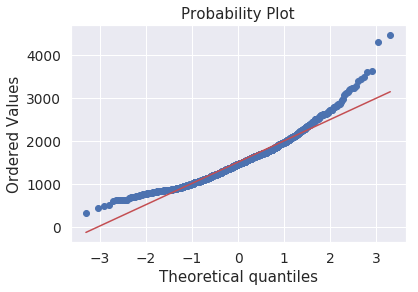

In [264]:
res = stats.probplot(df_train['GrLivArea'], plot=plt)

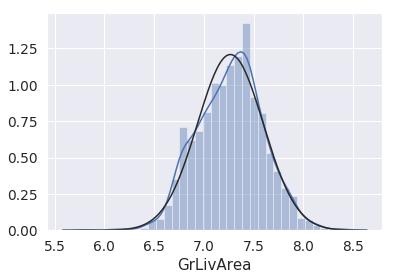

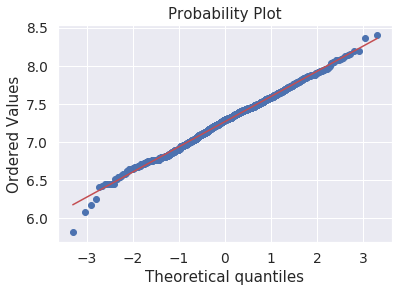

In [265]:
#apply log tranformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])
df_test['GrLivArea'] = np.log(df_test['GrLivArea'])
sns.distplot(df_train['GrLivArea'], fit=norm)
fig = plt.figure()
res =stats.probplot(df_train['GrLivArea'], plot=plt)

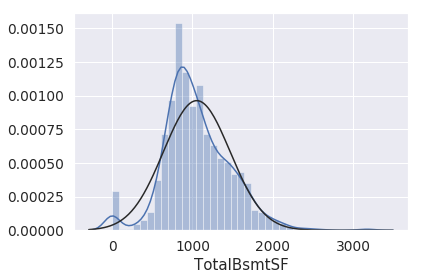

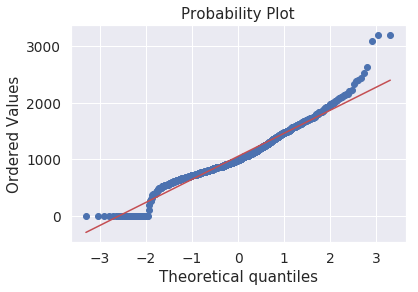

In [266]:
sns.distplot(df_train['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

In [267]:
df_train['TotalBsmtSF'].head()


0     856
1    1262
2     920
3     756
4    1145
Name: TotalBsmtSF, dtype: int64

In [268]:
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_test['HasBsmt'] = pd.Series(len(df_test['TotalBsmtSF']), index=df_test.index)

In [269]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice', 'HasBsmt'],
      dtype='object')

In [270]:
df_train['HasBsmt'] = 0
df_test['HasBsmt'] = 0

In [271]:
#help(df_train.loc())

In [272]:
df_train.loc[df_train['TotalBsmtSF'] > 0, 'HasBsmt'] = 1
df_test.loc[df_test['TotalBsmtSF'] > 0, 'HasBsmt'] = 1

In [273]:
df_train[df_train['HasBsmt'] == 1]['HasBsmt'].value_counts()

1    1420
Name: HasBsmt, dtype: int64

In [274]:
df_test.shape

(1459, 62)

In [275]:
df_train.shape

(1457, 63)

In [276]:
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])
df_test.loc[df_test['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_test['TotalBsmtSF'])

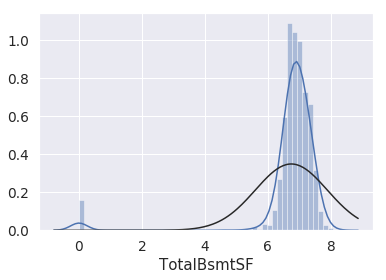

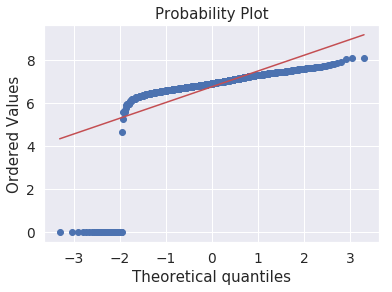

In [277]:
sns.distplot(df_train['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

In [278]:
df_train.shape

(1457, 63)

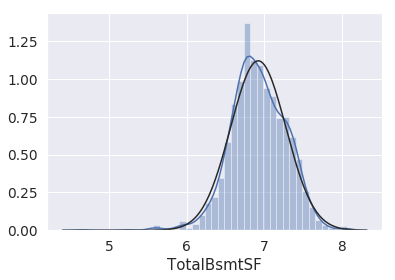

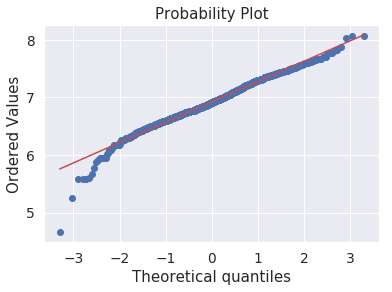

In [279]:
sns.distplot(df_train[df_train['TotalBsmtSF'] > 0]['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF'] > 0]['TotalBsmtSF'], plot=plt)

Text(0, 0.5, 'SalePrice')

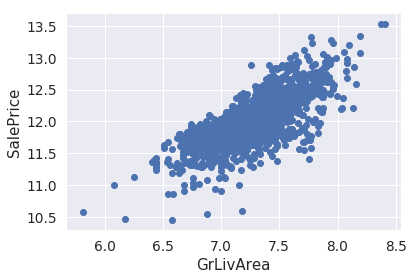

In [280]:
fig = plt.figure()
plt.scatter(df_train['GrLivArea'], df_train['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

Lúc ban đầu đồ thị khi biểu diễn quan hệ giữ 'GrLivArea' và 'SalePrice' có hình nón. Sau khi tranfer đồi thị biểu diễn chúng đã ko còn hình nón. Đã giải quyết được vấn đề đồng nhất (homoscedasticity).

Text(0, 0.5, 'SalePrice')

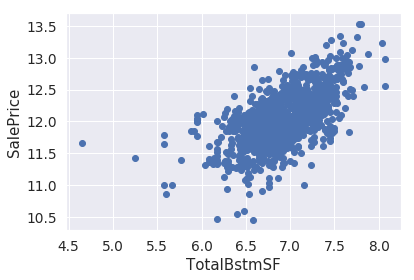

In [281]:
plt.scatter(df_train[df_train['TotalBsmtSF'] > 0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF'] > 0]['SalePrice'])
plt.xlabel('TotalBstmSF')
plt.ylabel('SalePrice')

In [282]:
df_test.shape

(1459, 62)

In [283]:
df_train.shape

(1457, 63)

In [284]:
np.where(df_test.columns.isin(df_train.columns) == True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),)

In [285]:
df_train.columns[np.where(df_test.columns.isin(df_train.columns) ==True) and np.where(df_test.dtypes.isin(df_train.dtypes) ==True)]

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [286]:
#df_test.dtypes

In [287]:
(df_train.dtypes == 'object').count()

63

In [288]:
(df_test.dtypes[:] == 'object').count()

62

In [289]:
np.where(df_test.dtypes.isin(df_train.dtypes) == False)

(array([], dtype=int64),)

In [290]:
Y_train = df_train['SalePrice']

In [291]:
df_train.drop(['SalePrice'], axis=1, inplace=True)

In [292]:
df_train.shape

(1457, 62)

In [293]:
df_test.shape

(1459, 62)

In [294]:
ntrain = df_train.shape[0]
test_Id = df_test.Id
df_train.drop(['Id'], axis=1, inplace=True)
df_test.drop(['Id'], axis=1, inplace=True)
df_all_data = pd.concat((df_train, df_test)).reset_index(drop=True)
print("shape all data", df_all_data.shape)

shape all data (2916, 61)


In [295]:
#convert categorical variable into dummy
#df_train = pd.get_dummies(df_train)
#df_test = pd.get_dummies(df_test)
df_all_data = pd.get_dummies(df_all_data)

In [296]:
df_all_data.shape

(2916, 189)

In [297]:
df_train = df_all_data[:ntrain]
df_test = df_all_data[ntrain:]
print("shape of df_train", df_train.shape)
print("shape of df_test", df_test.shape)

shape of df_train (1457, 189)
shape of df_test (1459, 189)


In [298]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [299]:
df_train.columns

Index(['MSSubClass', 'LotArea', 'Street', 'LotShape', 'LandSlope',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'ExterQual',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=189)

In [300]:
X_train = df_train[df_train.columns[df_train.columns != 'SalePrice']]

In [301]:
#Y_train

In [302]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(df_train.values)
    rmse= np.sqrt(-cross_val_score(model, df_train.values, Y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

#### GBoost model

In [303]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [ ]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [ ]:
GBoost.fit(X_train, Y_train)

#### Lasso model 

In [ ]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [ ]:
lasso.fit(X_train,Y_train)

In [ ]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

#### XGBRegressor model

In [ ]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [ ]:
model_xgb.fit(X_train, Y_train)

In [ ]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

##### Apply test set

In [ ]:
X_test = df_test

In [ ]:
X_test.columns

In [ ]:
pre_lass = lasso.predict(X_test)
pre = np.expm1(pre_lass)

In [ ]:
pre_gboost = GBoost.predict(X_test)

In [ ]:
pre_gboost = np.expm1(pre_gboost)

In [ ]:
pre = model_xgb.predict(X_test)

In [ ]:
pre = np.expm1(pre)

In [ ]:
pre_XGBoost = model_xgb.predict(X_test)
pre = np.expm1(pre_XGBoost)

Make submition

In [ ]:
#write submition
sub = pd.DataFrame()
sub['Id'] = test_Id
sub['SalePrice'] = pre
sub.to_csv('submission.csv',index=False)